# In-sample RMSE for linear regression on diamonds

As you saw in the video, included in the course is the diamonds dataset, which is a classic dataset from the ggplot2 package. The dataset contains physical attributes of diamonds as well as the price they sold for. One interesting modeling challenge is predicting diamond price based on their attributes using something like a linear regression.

Recall that to fit a linear regression, you use the lm() function in the following format:

mod <- lm(y ~ x, my_data)
To make predictions using mod on the original data, you call the predict() function:

pred <- predict(mod, my_data)

Instructions
Fit a linear model on the diamonds dataset predicting price using all other variables as predictors (i.e. price ~ .). Save the result to model.
Make predictions using model on the full original dataset and save the result to p.
Compute errors using the formula errors=predicted−actualerrors=predicted−actual. Save the result to error.
Compute RMSE using the formula you learned in the video and print it to the console.

In [1]:
library(ggplot2)
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [2]:
# Fit lm model: model
model <- lm(price~., diamonds)

# Predict on full data: p
p <- predict(model, diamonds, type="response")

# Compute errors: error
error = p-diamonds$price

# Calculate RMSE
print(sqrt(mean(error^2)))

[1] 1129.843


In [3]:
rm(model)

In [9]:
# Fit lm model: model
model <- lm(price~., diamonds)

# Predict on full data: p
p <- predict(model, diamonds[,-7], type="response")

# Compute errors: error
error = p-diamonds$price

# Calculate RMSE
print(sqrt(mean(error^2)))

[1] 1129.843


In [11]:
head(subset(diamonds, select = c(-price)))

carat,cut,color,clarity,depth,table,x,y,z
0.23,Ideal,E,SI2,61.5,55,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,3.94,3.96,2.48


# Randomly order the data frame

One way you can take a train/test split of a dataset is to order the dataset randomly, then divide it into the two sets. This ensures that the training set and test set are both random samples and that any biases in the ordering of the dataset (e.g. if it had originally been ordered by price or size) are not retained in the samples we take for training and testing your models. You can think of this like shuffling a brand new deck of playing cards before dealing hands.

First, you set a random seed so that your work is reproducible and you get the same random split each time you run your script:

set.seed(42)
Next, you use the sample() function to shuffle the row indices of the diamonds dataset. You can later use these these indices to reorder the dataset.

rows <- sample(nrow(diamonds))
Finally, you can use this random vector to reorder the diamonds dataset:

diamonds <- diamonds[rows, ]

Instructions
Set the random seed to 42.
Make a vector of row indices called rows.
Randomly reorder the diamonds data frame.

In [ ]:
# Set seed
set.seed(42)

# Shuffle row indices: rows
rows <- sample(nrow(diamonds))

# Randomly order data
diamonds <- diamonds[rows,]

Try an 80/20 split
100xp
Now that your dataset is randomly ordered, you can split the first 80% of it into a training set, and the last 20% into a test set. You can do this by choosing a split point approximately 80% of the way through your data:

split <- round(nrow(mydata) * .80)
You can then use this point to break off the first 80% of the dataset as a training set:

mydata[1:split, ]
And then you can use that same point to determine the test set:

mydata[(split + 1):nrow(mydata), ]
Instructions
Choose a row index to split on so that the split point is approximately 80% of the way through the diamonds dataset. Call this index split.
Create a training set called train using that index.
Create a test set called test using that index.

In [1]:
library(ggplot2)

In [2]:
# Determine row to split on: split
split <- round(nrow(diamonds) * .80)

# Create train
train <- diamonds[1:split,]

# Create test
test <- diamonds[(split+1):nrow(diamonds),]

Predict on test set
100xp
Now that you have a randomly split training set and test set, you can use the lm() function as you did in the first exercise to fit a model to your training set, rather than the entire dataset. Recall that you can use the formula interface to the linear regression function to fit a model with a specified target variable using all other variables in the dataset as predictors:

mod <- lm(y ~ ., training_data)
You can use the predict() function to make predictions from that model on new data. The new dataset must have all of the columns from the training data, but they can be in a different order with different values. Here, rather than re-predicting on the training set, you can predict on the test set, which you did not use for training the model. This will allow you to determine the out-of-sample error for the model in the next exercise:

p <- predict(model, new_data)
Instructions
Fit an lm() model called model to predict price using all other variables as covariates. Be sure to use the training set, train.
Predict on the test set, test, using predict(). Store these values in a vector called p.

In [3]:
# Fit lm model on train: model
model = lm(price~., train)

# Predict on test: p
p <- predict(model, test)

Calculate test set RMSE by hand
100xp
Now that you have predictions on the test set, you can use these predictions to calculate an error metric (in this case RMSE) on the test set and see how the model performs out-of-sample, rather than in-sample as you did in the first exercise. You first do this by calculating the errors between the predicted diamond prices and the actual diamond prices by subtracting the predictions from the actual values.

Once you have an error vector, calculating RMSE is as simple as squaring it, taking the mean, then taking the square root:

sqrt(mean(error^2))
Instructions
test, model, and p are loaded in your workspace.

Calculate the error between the predictions on the test set and the actual diamond prices in the test set. Call this error.
Calculate RMSE using this error vector, just printing the result to the console.

In [4]:
# Compute errors: error
error <- p-test$price

# Calculate RMSE
print(sqrt(mean(error^2)))

[1] 796.8922


# Cross-validation

Advantage of cross-validation
50xp
What is the advantage of cross-validation over a single train/test split?

Correct! If all of your estimates give similar outputs, you can be more certain of the model's accuracy. If your estimates give different outputs, that tells you the model does not perform consistently and suggests a problem with it.

### 10-fold cross-validation
100xp
As you saw in the video, a better approach to validating models is to use multiple systematic test sets, rather than a single random train/test split. Fortunately, the caret package makes this very easy to do:

model <- train(y ~ ., my_data)
caret supports many types of cross-validation, and you can specify which type of cross-validation and the number of cross-validation folds with the trainControl() function, which you pass to the trControl argument in train():

model <- train(
  y ~ ., my_data,
  method = "lm",
  trControl = trainControl(
    method = "cv", number = 10,
    verboseIter = TRUE
  )
)
It's important to note that you pass the method for modeling to the main train() function and the method for cross-validation to the trainControl() function.

Instructions
Fit a linear regression to model price using all other variables in the diamonds dataset as predictors. Use the train() function and 10-fold cross-validation. (Note that we've taken a subset of the full diamonds dataset to speed up this operation, but it's still named diamonds.)
Print the model to the console and examine the results.

In [6]:
library(caret)

Loading required package: lattice


In [7]:
# Fit lm model using 10-fold CV: model
model <- train(
  price~., diamonds,
  method = "lm",
  trControl = trainControl(
    method = "cv", number = 10,
    verboseIter = TRUE
  )
)

# Print model to console
print(model)

+ Fold01: intercept=TRUE 
- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 
- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 
- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 
- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 
- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 
- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 
- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 
- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 
- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 
- Fold10: intercept=TRUE 
Aggregating results
Fitting final model on full training set
Linear Regression 

53940 samples
    9 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 48547, 48545, 48547, 48546, 48546, 48546, ... 
Resampling results:

  RMSE      Rsquared 
  1130.893  0.9196817

Tuning parameter 'intercept' was held constant at a value of TRUE
 


### 5-fold cross-validation
100xp
In this course, you will use a wide variety of datasets to explore the full flexibility of the caret package. Here, you will use the famous Boston housing dataset, where the goal is to predict median home values in various Boston suburbs.

You can use exactly the same code as in the previous exercise, but change the dataset used by the model:

model <- train(
  medv ~ ., Boston,
  method = "lm",
  trControl = trainControl(
    method = "cv", number = 10,
    verboseIter = TRUE
  )
)
Next, you can reduce the number of cross-validation folds from 10 to 5 using the number argument to the trainControl() argument:

trControl = trainControl(
  method = "cv", number = 5,
  verboseIter = TRUE
)
Instructions
Fit an lm() model to the Boston housing dataset, such that medv is the response variable and all other variables are explanatory variables.
Use 5-fold cross-validation rather than 10-fold cross-validation.
Print the model to the console and inspect the results.

In [ ]:
# Fit lm model using 5-fold CV: model
model <- train(
  medv~., Boston,
  method = "lm",
  trControl = trainControl(
    method = "cv", number = 5,
    verboseIter = TRUE
  )
)

# Print model to console
print(model)

### 5 x 5-fold cross-validation
100xp
You can do more than just one iteration of cross-validation. Repeated cross-validation gives you a better estimate of the test-set error. You can also repeat the entire cross-validation procedure. This takes longer, but gives you many more out-of-sample datasets to look at and much more precise assessments of how well the model performs.

One of the awesome things about the train() function in caret is how easy it is to run very different models or methods of cross-validation just by tweaking a few simple arguments to the function call. For example, you could repeat your entire cross-validation procedure 5 times for greater confidence in your estimates of the model's out-of-sample accuracy, e.g.:

trControl = trainControl(
  method = "cv", number = 5,
  repeats = 5, verboseIter = TRUE
)
Instructions
Re-fit the linear regression model to the Boston housing dataset.
Use 5 repeats of 5-fold cross-validation.
Print the model to the console.

In [12]:
library(MASS)
data(Boston)
# Fit lm model using 5 x 5-fold CV: model
model <- train(
  medv ~ ., Boston,
  method = "lm",
  trControl = trainControl(
    method = "cv", number = 5,
    repeats = 5, verboseIter = TRUE
  )
)

# Print model to console
print(model)

+ Fold1: intercept=TRUE 
- Fold1: intercept=TRUE 
+ Fold2: intercept=TRUE 
- Fold2: intercept=TRUE 
+ Fold3: intercept=TRUE 
- Fold3: intercept=TRUE 
+ Fold4: intercept=TRUE 
- Fold4: intercept=TRUE 
+ Fold5: intercept=TRUE 
- Fold5: intercept=TRUE 
Aggregating results
Fitting final model on full training set
Linear Regression 

506 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 404, 405, 405, 404, 406 
Resampling results:

  RMSE      Rsquared 
  4.787659  0.7290551

Tuning parameter 'intercept' was held constant at a value of TRUE
 


Making predictions on new data
100xp
Finally, the model you fit with the train() function has the exact same predict() interface as the linear regression models you fit earlier in this chapter.

After fitting a model with train(), you can simply call predict() with new data, e.g:

predict(my_model, new_data)
Instructions
Use the predict() function to make predictions with model on the full Boston housing dataset. Print the result to the console.

In [ ]:
# Predict on full Boston dataset
predict(model, Boston)

# Logistic regression on sonar

Try a 60/40 split
100xp
As you saw in the video, you'll be working with the Sonar dataset in this chapter, using a 60% training set and a 40% test set. We'll practice making a train/test split one more time, just to be sure you have the hang of it. Recall that you can use the sample() function to get a random permutation of the row indices in a dataset, to use when making train/test splits, e.g.:

rows <- sample(nrow(my_data))
And then use those row indices to randomly reorder the dataset, e.g.:

my_data <- my_data[rows, ]
Once your dataset is randomly ordered, you can split off the first 60% as a training set and the last 40% as a test set.

Instructions
Shuffle the row indices of Sonar and store the result in rows.
Use rows to randomly reorder the rows of Sonar.
Identify the proper row to split on for a 60/40 split. Store this row number as split.
Save the first 60% as a training set.
Save the last 40% as the test set.

In [15]:
library(mlbench)
data(Sonar)
head(Sonar)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [19]:
# Set seed
set.seed(42)

In [20]:
# Shuffle row indices: rows
rows <- sample(nrow(Sonar))

# Randomly order data: Sonar
Sonar <- Sonar[rows,]

# Identify row to split on: split
split <- round(nrow(Sonar) * 0.6)

# Create train
train <- Sonar[1:split,]

# Create test
test <- Sonar[(split+1):nrow(Sonar),]

Fit a logistic regression model
100xp
Once you have your random training and test sets you can fit a logistic regression model to your training set using the glm() function. glm() is a more advanced version of lm() that allows for more varied types of regression models, aside from plain vanilla ordinary least squares regression.

Be sure to pass the argument family = "binomial" to glm() to specify that you want to do logistic (rather than linear) regression. For example:

glm(Target ~ ., family = "binomial", dataset)
Don't worry about warnings like glm.fit: algorithm did not converge or glm.fit: fitted probabilities numerically 0 or 1 occurred. These are common on smaller datasets and usually don't cause any issues. They typically mean your dataset is perfectly seperable, which can cause problems for the math behind the model, but R's glm() function is almost always robust enough to handle this case with no problems.

Once you have a glm() model fit to your dataset, you can predict the outcome (e.g. rock or mine) on the test set using the predict() function with the argument type = "response":

predict(my_model, test, type = "response")
Instructions
Fit a logistic regression called model to predict Class using all other variables as predictors. Use the training set for Sonar.
Predict on the test set using that model. Call the result p like you've done before.

In [21]:
# Fit glm model: model
model <- glm(Class~., family="binomial", train)

# Predict on test: p
p <- predict(model, test, type="response")

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

# Confusion matrix

Calculate a confusion matrix
100xp
As you saw in the video, a confusion matrix is a very useful tool for calibrating the output of a model and examining all possible outcomes of your predictions (true postive, true negative, false positive, false negative).

Before you make your confusion matrix, you need to "cut" your predicted probabilities at a given threshold to turn probabilities into class predictions. You can do this easily with the ifelse() function, e.g.:

class_prediction <-
  ifelse(probability_prediction > 0.50,
         "positive_class",
         "negative_class"
  )
You could make such a contingency table with the table() function in base R, but confusionMatrix() in caret yields a lot of useful ancillary statistics in addition to the base rates in the table. You can calculate the confusion matrix (and the associated statistics) using the predicted outcomes as well as the actual outcomes, e.g.:

confusionMatrix(predicted, actual)
Instructions
Turn the numeric predictions p into a vector of class predictions called p_class, using a prediction cutoff of 0.50. Make sure to use "M" for the positive class and "R" for the negative class when making predictions, to match the classes in the original data.
Make a confusion matrix using p_class, the actual values in the test set, and the confusionMatrix() function.

In [22]:
# Calculate class probabilities: p_class
p_class <- ifelse(p > 0.50, "M","R")

# Create confusion matrix
confusionMatrix(p_class, test$Class)

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M 11 22
         R 34 16
                                         
               Accuracy : 0.3253         
                 95% CI : (0.2265, 0.437)
    No Information Rate : 0.5422         
    P-Value [Acc > NIR] : 1.0000         
                                         
                  Kappa : -0.3265        
 Mcnemar's Test P-Value : 0.1416         
                                         
            Sensitivity : 0.2444         
            Specificity : 0.4211         
         Pos Pred Value : 0.3333         
         Neg Pred Value : 0.3200         
             Prevalence : 0.5422         
         Detection Rate : 0.1325         
   Detection Prevalence : 0.3976         
      Balanced Accuracy : 0.3327         
                                         
       'Positive' Class : M              
                                         

### Calculating accuracy
50xp
Use confusionMatrix(p_class, test[["Class"]]) to calculate a confusion matrix on the test set.

What is the test set accuracy of this model (rounded to the nearest percent)?

70%

### Calculating true postive rate
50xp
Use confusionMatrix(p_class, test[["Class"]]) to calculate a confusion matrix on the test set.

What is the test set true positive rate (or sensitivity) of this model (rounded to the nearest percent)?

83%

### Calculating true negative rate
50xp
Use confusionMatrix(p_class, test[["Class"]]) to calculate a confusion matrix on the test set.

What is the test set true negative rate (or specificity) of this model (rounded to the nearest percent)?

51%

Probabilities and classes
50xp
What's the relationship between the predicted probabilities and the predicted classes?

You determine the predicted probabilities by looking at the average accuracy of the predicted classes.
1
There is no relationship; they're completely different things.
2
Predicted classes are based off of predicted probabilities plus a classification threshold.(Correct)

Try another threshold
100xp
In the previous exercises, you used a threshold of 0.50 to cut your predicted probabilities to make class predictions (rock vs mine). However, this classification threshold does not always align with the goals for a given modeling problem.

For example, pretend you want to identify the objects you are really certain are mines. In this case, you might want to use a probability threshold of 0.90 to get fewer predicted mines, but with greater confidence in each prediction.

In this exercise, you will simply look at the highly likely mines, which you can isolate using the ifelse() function in R:

pred <- ifelse(probability > threshold, "M", "R")
You can then call the confusionMatrix() function in the same way as in the previous exercise.

confusionMatrix(pred, actual)
Instructions
Turn the numeric predictions p into a vector of class predictions called p_class, using a prediction cutoff of 0.90.
Make sure to use "M" for the positive class and "R" for the negative class when making predictions, to match the classes in the original data.
Make a confusion matrix using p_class, the actual values from the test set, and the confusionMatrix() function.

In [ ]:
# Apply threshold of 0.9: p_class
p_class <- ifelse(p > 0.9, "M","R")

# Create confusion matrix
confusionMatrix(p_class, test$Class)

From probabilites to confusion matrix
100xp
Conversely, say you want to be really certain that your model correctly identifies all the mines as mines. In this case, you might use a prediction threshold of 0.10, instead of 0.90.

You can construct the confusion matrix in the same way you did before, using your new predicted classes:

pred <- ifelse(probability > threshold, "M", "R")
You can then call the confusionMatrix() function in the same way as in the previous exercise:

confusionMatrix(pred, actual)
Instructions
Turn the numeric predictions p into a vector of class predictions called p_class, using a prediction cutoff of 0.10.
Make sure to use "M" for the positive class and "R" for the negative class when making predictions to match the classes in the original data.
Make a confusion matrix using p_class and the confusionMatrix() function.

In [ ]:
# Apply threshold of 0.10: p_class
p_class <- ifelse(p > 0.1, "M","R")

# Create confusion matrix
confusionMatrix(p_class, test$Class)

# Introducing the ROC curve

What's the value of a ROC curve?
50xp
What is the primary value of an ROC curve?

Possible Answers
It has a cool acronym.
It can be used to determine the true positive and false positive rates for a particular classification threshold.
It evaluates all possible thresholds for splitting predicted probabilities into predicted classes. (Correct)

### Plot an ROC curve
100xp
As you saw in the video, an ROC curve is a really useful shortcut for summarizing the performance of a classifier over all possible thresholds. This saves you a lot of tedious work computing class predictions for many different thresholds and examining the confusion matrix for each.

My favorite package for computing ROC curves is caTools, which contains a function called colAUC(). This function is very user-friendly and can actually calculate ROC curves for multiple predictors at once. In this case, you only need to calculate the ROC curve for one predictor, e.g.:

colAUC(predicted_probabilities, actual, plotROC = TRUE)
The function will return a score called AUC (more on that later) and the plotROC = TRUE argument will return the plot of the ROC curve for visual inspection.

Instructions
model, test, and train from the last exercise using the sonar data are loaded in your workspace.

Predict probabilities (i.e. type = "response") on the test set, then store the result as p.
Make an ROC curve using the predicted test set probabilities.

M vs. R,0.6976608


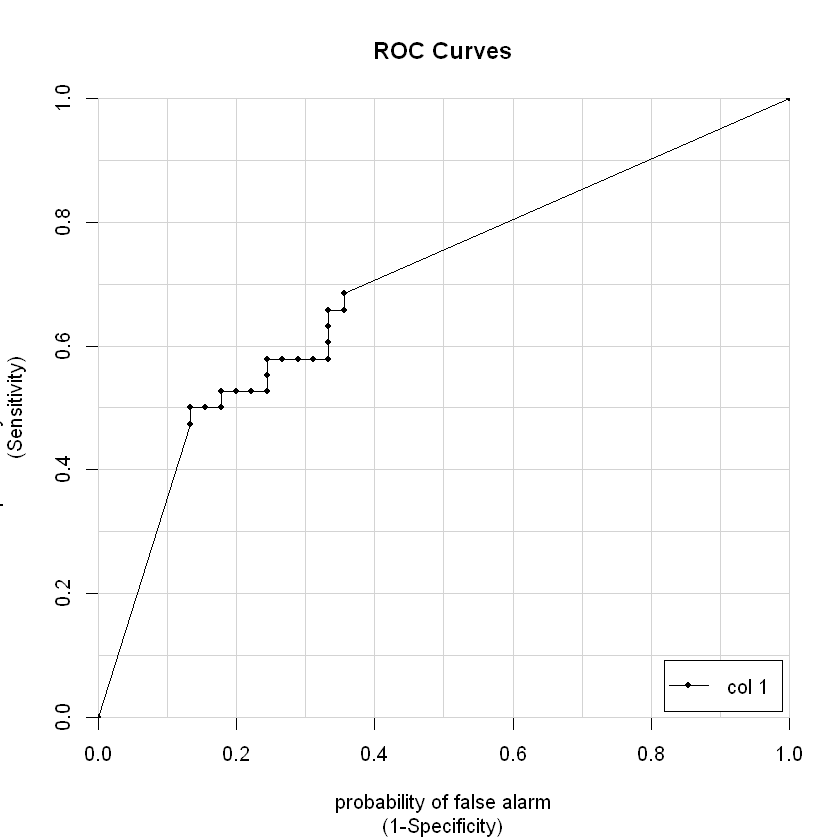

In [23]:
library(caTools)
# Predict on test: p
p <- predict(model, test, type="response")

# Make ROC curve
colAUC(p, test$Class, plotROC=TRUE)

### Area under the curve

Model, ROC, and AUC
50xp
What is the AUC of a perfect model?

Possible Answers
0.00
0.50
1.00 (Correct)

Customizing trainControl
100xp
As you saw in the video, area under the ROC curve is a very useful, single-number summary of a model's ability to discriminate the positive from the negative class (e.g. mines from rocks). An AUC of 0.5 is no better than random guessing, an AUC of 1.0 is a perfectly predictive model, and an AUC of 0.0 is perfectly anti-predictive (which rarely happens).

This is often a much more useful metric than simply ranking models by their accuracy at a set threshold, as different models might require different calibration steps (looking at a confusion matrix at each step) to find the optimal classification threshold for that model.

You can use the trainControl() function in caret to use AUC (instead of acccuracy), to tune the parameters of your models. The twoClassSummary() convenience function allows you to do this easily.

When using twoClassSummary(), be sure to always include the argument classProbs = TRUE or your model will throw an error! (You cannot calculate AUC with just class predictions. You need to have class probabilities as well.)

Instructions
Customize the trainControl object to use twoClassSummary rather than defaultSummary.
Use 10-fold cross-validation.
Be sure to tell trainControl() to return class probabilities.

In [ ]:
# Create trainControl object: myControl
myControl <- trainControl(
  method = "cv",
  number = 10,
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE
)

### Using custom trainControl
100xp
Now that you have a custom trainControl object, it's easy to fit caret models that use AUC rather than accuracy to tune and evaluate the model. You can just pass your custom trainControl object to the train() function via the trControl argument, e.g.:

train(<standard arguments here>, trControl = myControl)
This syntax gives you a convenient way to store a lot of custom modeling parameters and then use them across multiple different calls to train(). You will make extensive use of this trick in Chapter 5.

Instructions
Use train() to fit a glm model (i.e. method = "glm") to Sonar using your custom trainControl object, myControl. You want to predict Class from all other variables in the data (i.e. Class ~ .). Save the result to model.
Print the model to the console and examine its output.

In [ ]:
# Train glm with custom trainControl: model
model <- train(Class~.,Sonar, method="glm", trControl=myControl)


# Print model to console
print(model)

# Random forests and wine

Fit a random forest
100xp
As you saw in the video, random forest models are much more flexible than linear models, and can model complicated nonlinear effects as well as automatically capture interactions between variables. They tend to give very good results on real world data, so let's try one out on the wine quality dataset, where the goal is to predict the human-evaluated quality of a batch of wine, given some of the machine-measured chemical and physical properties of that batch.

Fitting a random forest model is exactly the same as fitting a generalized linear regression model, as you did in the previous chapter. You simply change the method argument in the train function to be "ranger". The ranger package is a rewrite of R's classic randomForest package and fits models much faster, but gives almost exactly the same results. We suggest that all beginners use the ranger package for random forest modeling.

Instructions
Train a random forest called model on the wine quality dataset, wine, such that quality is the response variable and all other variables are explanatory variables.
Use method = "ranger".
Use a tuneLength of 1.
Use 5 CV folds.
Print model to the console.

In [ ]:
# Fit random forest: model
model <- train(
  quality~.,
  tuneLength = 1,
  data = wine, method = "ranger",
  trControl = trainControl(method = "cv", number = 5, verboseIter = TRUE)
)

# Print model to console
print(model)

### Explore a wider model space

Try a longer tune length
100xp
Recall from the video that random forest models have a primary tuning parameter of mtry, which controls how many variables are exposed to the splitting search routine at each split. For example, suppose that a tree has a total of 10 splits and mtry = 2. This means that there are 10 samples of 2 predictors each time a split is evaluated.

Use a larger tuning grid this time, but stick to the defaults provided by the train() function. Try a tuneLength of 3, rather than 1, to explore some more potential models, and plot the resulting model using the plot function.

Instructions
Train a random forest model, model, using the wine dataset on the quality variable with all other variables as explanatory variables. (This will take a few seconds to run, so be patient!)
Use method = "ranger".
Use a tuneLength of 3.
Use 5 CV folds.
Print model to the console.
Plot the model after fitting it.

In [ ]:
# Fit random forest: model
model <- train(
  quality~.,
  tuneLength = 3,
  data = wine, method = "ranger",
  trControl = trainControl(method = "cv", number = 5, verboseIter = TRUE)
)

# Print model to console
print(model)

# Plot model
plot(model)

### Custom tuning grids

Fit a random forest with custom tuning
100xp
Now that you've explored the default tuning grids provided by the train() function, let's customize your models a bit more.

You can provide any number of values for mtry, from 2 up to the number of columns in the dataset. In practice, there are diminishing returns for much larger values of mtry, so you will use a custom tuning grid that explores 2 simple models (mtry = 2 and mtry = 3) as well as one more complicated model (mtry = 7).

Instructions
Train another random forest model, model, using the wine dataset on the quality variable with all other variables as explanatory variables.
Use method = "ranger".
Use a custom tuneGrid with data.frame(mtry = c(2, 3, 7)).
Use 5 CV folds.
Print model to the console.
Plot the model after fitting it using plot().

In [ ]:
# Fit random forest: model
model <- train(
  quality~.,
  tuneGrid = data.frame(mtry = c(2, 3, 7)),
  data = wine, method = "ranger",
  trControl = trainControl(method = "cv", number = 5, verboseIter = TRUE)
)

# Print model to console
print(model)

# Plot model

### Introducing glmnet

Advantage of glmnet
50xp
What's the advantage of glmnet over regular glm models?

Possible Answers
glmnet models automatically find interaction variables.
glmnet models don't provide p-values or confidence intervals on predictions.
glmnet models place constraints on your coefficients, which helps prevent overfitting. (Correct)

Make a custom trainControl
100xp
The wine quality dataset was a regression problem, but now you are looking at a classification problem. This is a simulated dataset based on the "don't overfit" competition on Kaggle a number of years ago.

Classification problems are a little more complicated than regression problems because you have to provide a custom summaryFunction to the train() function to use the AUC metric to rank your models. Start by making a custom trainControl, as you did in the previous chapter. Be sure to set classProbs = TRUE, otherwise the twoClassSummary for summaryFunction will break.

Instructions
Make a custom trainControl called myControl for classification using the trainControl function.

Use 10 CV folds.
Use twoClassSummary for the summaryFunction.
Be sure to set classProbs = TRUE.

In [ ]:
# Create custom trainControl: myControl
myControl <- trainControl(
  method = "cv", number = 10,
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE
)

Fit glmnet with custom trainControl
100xp
Now that you have a custom trainControl object, fit a glmnet model to the "don't overfit" dataset. Recall from the video that glmnet is an extention of the generalized linear regression model (or glm) that places constraints on the magnitude of the coefficients to prevent overfitting. This is more commonly known as "penalized" regression modeling and is a very useful technique on datasets with many predictors and few values.

glmnet is capable of fitting two different kinds of penalized models, controlled by the alpha parameter:

Ridge regression (or alpha = 0)
Lasso regression (or alpha = 1)
You'll now fit a glmnet model to the "don't overfit" dataset using the defaults provided by the caret package.

Instructions
Train a glmnet model called model on the overfit data. Use the custom trainControl from the previous exercise (myControl). The variable y is the response variable and all other variables are explanatory variables.
Print the model to the console.
Use the max() function to find the maximum of the ROC statistic contained somewhere in model[["results"]].

In [ ]:
# Fit glmnet model: model
model <- train(
  y~., data=overfit,
  method = "glmnet",
  trControl = myControl
)

# Print model to console
print(model)

# Print maximum ROC statistic
print(max(model[["results"]]))

### glmnet with custom tuning grid

glmnet with custom trainControl and tuning
100xp
As you saw in the video, the glmnet model actually fits many models at once (one of the great things about the package). You can exploit this by passing a large number of lambda values, which control the amount of penalization in the model. train() is smart enough to only fit one model per alpha value and pass all of the lambda values at once for simultaneous fitting.

My favorite tuning grid for glmnet models is:

expand.grid(alpha = 0:1,
  lambda = seq(0.0001, 1, length = 100))
This grid explores a large number of lambda values (100, in fact), from a very small one to a very large one. (You could increase the maximum lambda to 10, but in this exercise 1 is a good upper bound.)

If you want to explore fewer models, you can use a shorter lambda sequence. For example, lambda = seq(0.0001, 1, length = 10) would fit 10 models per value of alpha.

You also look at the two forms of penalized models with this tuneGrid: ridge regression and lasso regression. alpha = 0 is pure ridge regression, and alpha = 1 is pure lasso regression. You can fit a mixture of the two models (i.e. an elastic net) using an alpha between 0 and 1. For example, alpha = .05 would be 95% ridge regression and 5% lasso regression.

In this problem you'll just explore the 2 extremes--pure ridge and pure lasso regression--for the purpose of illustrating their differences.

Instructions
Train a glmnet model on the overfit data such that y is the response variable and all other variables are explanatory variables. Make sure to use your custom trainControl from the previous exercise (myControl). Also, use a custom tuneGrid to explore alpha = 0:1 and 20 values of lambda between 0.0001 and 1 per value of alpha.
Print model to the console.
Print the max() of the ROC statistic in model[["results"]]. You can access it using model[["results"]][["ROC"]].

In [ ]:
# Train glmnet with custom trainControl and tuning: model
model <- train(
  y~., overfit,
  tuneGrid = expand.grid(alpha = 0:1,lambda = seq(0.0001,1,length = 20)),
  method = "glmnet",
  trControl = myControl
)

# Print model to console
print(model)

# Print maximum ROC statistic
print(max(model[["results"]][["ROC"]]))

# Median imputation

Apply median imputation
100xp
In this chapter, you'll be using a version of the Wisconsin Breast Cancer dataset. This dataset presents a classic binary classification problem: 50% of the samples are benign, 50% are malignant, and the challenge is to identify which are which.

This dataset is interesting because many of the predictors contain missing values and most rows of the dataset have at least one missing value. This presents a modeling challenge, because most machine learning algorithms cannot handle missing values out of the box. For example, your first instinct might be to fit a logistic regression model to this data, but prior to doing this you need a strategy for handling the NAs.

Fortunately, the train() function in caret contains an argument called preProcess, which allows you to specify that median imputation should be used to fill in the missing values. In previous chapters, you created models with the train() function using formulas such as y ~ .. An alternative way is to specify the x and y arguments to train(), where x is an object with samples in rows and features in columns and y is a numeric or factor vector containing the outcomes. Said differently, x is a matrix or data frame that contains the whole dataset you'd use for the data argument to the lm() call, for example, but excludes the response variable column; y is a vector that contains just the response variable column.

For this exercise, the argument x to train() is loaded in your workspace as breast_cancer_x and y as breast_cancer_y.

Instructions
Use the train() function to fit a glm model called model to the breast cancer dataset. Use preProcess = "medianImpute" to handle the missing values.
Print model to the console.

In [ ]:
# Apply median imputation: model
model <- train(
  x = breast_cancer_x, y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess = "medianImpute"
)

# Print model to console
print(model)

### KNN imputation

Use KNN imputation
100xp
In the previous exercise, you used median imputation to fill in missing values in the breast cancer dataset, but that is not the only possible method for dealing with missing data.

An alternative to median imputation is k-nearest neighbors, or KNN, imputation. This is a more advanced form of imputation where missing values are replaced with values from other rows that are similar to the current row. While this is a lot more complicated to implement in practice than simple median imputation, it is very easy to explore in caret using the preProcess argument to train(). You can simply use preProcess = "knnImpute" to change the method of imputation used prior to model fitting.

Instructions
breast_cancer_x and breast_cancer_y are loaded in your workspace.

Use the train() function to fit a glm model called model2 to the breast cancer dataset.
Use KNN imputation to handle missing values.

In [ ]:
# Apply KNN imputation: model2
model2 <- train(
  x = breast_cancer_x, y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess = "knnImpute"
)

# Print model to console
print(model2)

Compare KNN and median imputation
100xp
All of the preprocessing steps in the train() function happen in the training set of each cross-validation fold, so the error metrics reported include the effects of the preprocessing.

This includes the imputation method used (e.g. knnImputate or medianImpute). This is useful because it allows you to compare different methods of imputation and choose the one that performs the best out-of-sample.

median_model and knn_model are available in your workspace, as is resamples, which contains the resampled results of both models. Look at the results of the models by calling

dotplot(resamples, metric = "ROC")
and choose the one that performs the best out-of-sample. Which method of imputation yields the highest out-of-sample ROC score for your glm model?

Possible Answers
KNN imputation is much better than median imputation.
KNN imputation is slightly better than median imputation. (Correct)
Median imputation is much better than KNN imputation.
Median imputation is slightly better than KNN imputation.

### Multiple preprocessing methods

Order of operations
50xp
Which comes first in caret's preProcess() function: median imputation or centering and scaling of variables?

Possible Answers
Median imputation comes before centering and scaling.(Correct)
Centering and scaling come before median imputation.

Combining preprocessing methods
100xp
The preProcess argument to train() doesn't just limit you to imputing missing values. It also includes a wide variety of other preProcess techniques to make your life as a data scientist much easier. You can read a full list of them by typing ?preProcess and reading the help page for this function.

One set of preprocessing functions that is particularly useful for fitting regression models is standardization: centering and scaling. You first center by subtracting the mean of each column from each value in that column, then you scale by dividing by the standard deviation.

Standardization transforms your data such that for each column, the mean is 0 and the standard deviation is 1. This makes it easier for regression models to find a good solution.

Instructions
breast_cancer_x and breast_cancer_y are loaded in your workspace. Fit two models called model1 and model2 to the breast cancer data, then print each to the console:

A logistic regression model using only median imputation: model1
A logistic regression model using median imputation, centering, and scaling (in that order): model2

In [ ]:
# Fit glm with median imputation: model1
model1 <- train(
  x = breast_cancer_x, y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess = "medianImpute"
)

# Print model1
print(model1)

# Fit glm with median imputation and standardization: model2
model2 <- train(
  x = breast_cancer_x, y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess = c("medianImpute","center", "scale")
)

# Print model2
print(model2)

### Handling low-information predictors

Why remove near zero variance predictors?
50xp
What's the best reason to remove near zero variance predictors from your data before building a model?

Possible Answers
Because they are guaranteed to have no effect on your model.
Because their p-values in a linear regression will always be low.
To reduce model-fitting time without reducing model accuracy. (Correct)

Remove near zero variance predictors
100xp
As you saw in the video, for the next set of exercises, you'll be using the blood-brain dataset. This is a biochemical dataset in which the task is to predict the following value for a set of biochemical compounds:

log((concentration of compound in brain) /
      (concentration of compound in blood))
This gives a quantitative metric of the compound's ability to cross the blood-brain barrier, and is useful for understanding the biological properties of that barrier.

One interesting aspect of this dataset is that it contains many variables and many of these variables have extemely low variances. This means that there is very little information in these variables because they mostly consist of a single value (e.g. zero).

Fortunately, caret contains a utility function called nearZeroVar() for removing such variables to save time during modeling.

nearZeroVar() takes in data x, then looks at the ratio of the most common value to the second most common value, freqCut, and the percentage of distinct values out of the number of total samples, uniqueCut. By default, caret uses freqCut = 19 and uniqueCut = 10, which is fairly conservative. I like to be a little more aggressive and use freqCut = 2 and uniqueCut = 20 when calling nearZeroVar().

Instructions
bloodbrain_x and bloodbrain_y are loaded in your workspace.

Identify the near zero variance predictors by running nearZeroVar() on the blood-brain dataset. Store the result as an object called remove_cols. Use freqCut = 2 and uniqueCut = 20 in the call to nearZeroVar().
Use names() to create a vector containing all column names of bloodbrain_x. Call this all_cols.
Make a new data frame called bloodbrain_x_small with the near-zero variance variables removed. Use setdiff() to isolate the column names that you wish to keep (i.e. that you don't want to remove.)

In [ ]:
# Identify near zero variance predictors: remove_cols
remove_cols <- nearZeroVar(bloodbrain_x, names = TRUE, 
                           freqCut = 2, uniqueCut = 20)

# Get all column names from bloodbrain_x: all_cols
all_cols <- names(bloodbrain_x)

# Remove from data: bloodbrain_x_small
bloodbrain_x_small <- bloodbrain_x[ , setdiff(all_cols, remove_cols)]

preProcess() and nearZeroVar()
50xp
Can you use the preProcess argument in caret to remove near-zero variance predictors? Or do you have to do this by hand, prior to modeling, using the nearZeroVar() function?

Possible Answers
Yes! Set the preProcess argument equal to "nzv". (Correct)
No, unfortunately. You have to do this by hand.

Fit model on reduced blood-brain data
100xp
Now that you've reduced your dataset, you can fit a glm model to it using the train() function. This model will run faster than using the full dataset and will yield very similar predictive accuracy.

Furthermore, zero variance variables can cause problems with cross-validation (e.g. if one fold ends up with only a single unique value for that variable), so removing them prior to modeling means you are less likely to get errors during the fitting process.

Instructions
bloodbrain_x, bloodbrain_y, remove, and bloodbrain_x_small are loaded in your workspace.

Fit a glm model using the train() function and the reduced blood-brain dataset you created in the previous exercise.
Print the result to the console.

In [ ]:
# Fit model on reduced data: model
model <- train(x = bloodbrain_x_small, y = bloodbrain_y, method = "glm")

# Print model to console
print(model)

### Principle components analysis (PCA)

Using PCA as an alternative to nearZeroVar()
100xp
An alternative to removing low-variance predictors is to run PCA on your dataset. This is sometimes preferable because it does not throw out all of your data: many different low variance predictors may end up combined into one high variance PCA variable, which might have a positive impact on your model's accuracy.

This is an especially good trick for linear models: the pca option in the preProcess argument will center and scale your data, combine low variance variables, and ensure that all of your predictors are orthogonal. This creates an ideal dataset for linear regression modeling, and can often improve the accuracy of your models.

Instructions
bloodbrain_x and bloodbrain_y are loaded in your workspace.

Fit a glm model to the full blood-brain dataset using the "pca" option to preProcess.
Print the model to the console and inspect the result.

In [ ]:
# Fit glm model using PCA: model
model <- train(
  x = bloodbrain_x, y = bloodbrain_y,
  method = "glm", preProcess = "pca"
)

# Print model to console
print(model)

# Case Study

# Reusing a trainControl

Why reuse a trainControl?
50xp
Why reuse a trainControl?

Possible Answers
So you can use the same summaryFunction and tuning parameters for multiple models.
So you don't have to repeat code when fitting multiple models.
So you can compare models on the exact same training and test data.
All of the above. (Correct)

#### Make custom train/test indices
100xp
As you saw in the video, for this chapter you will focus on a real-world dataset that brings together all of the concepts discussed in the previous chapters.

The churn dataset contains data on a variety of telecom customers and the modeling challenge is to predict which customers will cancel their service (or churn).

In this chapter, you will be exploring two different types of predictive models: glmnet and rf, so the first order of business is to create a reusable trainControl object you can use to reliably compare them.

Instructions
churn_x and churn_y are loaded in your workspace.

Use createFolds() to create 5 CV folds on churn_y, your target variable for this exercise.
Pass them to trainControl() to create a reusable trainControl for comparing models.

In [ ]:
# Create custom indices: myFolds
myFolds <- createFolds(churn_y, k = 5)

# Create reusable trainControl object: myControl
myControl <- trainControl(
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE,
  savePredictions = TRUE,
  index = myFolds
)

#### Reintroduce glmnet

glmnet as a baseline model
50xp
What makes glmnet a good baseline model?

Possible Answers
It's simple, fast, and easy to interpret. (Correct)
It always gives poor predictions, so your other models will look good by comparison.
Linear models with penalties on their coefficients always give better results.

Fit the baseline model
100xp
Now that you have a reusable trainControl object called myControl, you can start fitting different predictive models to your churn dataset and evaluate their predictive accuracy.

You'll start with one of my favorite models, glmnet, which penalizes linear and logistic regression models on the size and number of coefficients to help prevent overfitting.

Instructions
Fit a glmnet model to the churn dataset called model_glmnet. Make sure to use myControl, which you created in the first exercise and is available in your workspace, as the trainControl object.

In [ ]:
# Fit glmnet model: model_glmnet
model_glmnet <- train(
  x = churn_x, y = churn_y,
  metric = "ROC",
  method = "glmnet",
  trControl = myControl
)

#### Reintroduce random forest

Random forest drawback
50xp
What's the drawback of using a random forest model for churn prediction?

Possible Answers
Tree-based models are usually less accurate than linear models.
You no longer have model coefficients to help interpret the model. (Correct)
Nobody else uses random forests to predict churn.

Random forest with custom trainControl
100xp
Another one of my favorite models is the random forest, which combines an ensemble of non-linear decision trees into a highly flexible (and usually quite accurate) model.

Rather than using the classic randomForest package, you'll be using the ranger package, which is a re-implementation of randomForest that produces almost the exact same results, but is faster, more stable, and uses less memory. I highly recommend it as a starting point for random forest modeling in R.

Instructions
churn_x and churn_y are loaded in your workspace.

Fit a random forest model to the churn dataset. Be sure to use myControl as the trainControl like you've done before and implement the "ranger" method.

In [ ]:
# Fit random forest: model_rf
model_rf <- train(
  x = churn_x, y = churn_y,
  metric = "ROC",
  method = "ranger",
  trControl = myControl
)

#### Comparing models

What's the primary reason that train/test indices need to match when comparing two models?

Possible Answers
You can save a lot of time when fitting your models because you don't have to remake the datasets.
There's no real reason; it just makes your plots look better.
Because otherwise you wouldn't be doing a fair comparison of your models and your results could be due to chance. (Correct)


Create a resamples object
100xp
Now that you have fit two models to the churn dataset, it's time to compare their out-of-sample predictions and choose which one is the best model for your dataset.

You can compare models in caret using the resamples() function, provided they have the same training data and use the same trainControl object with preset cross-validation folds. resamples() takes as input a list of models and can be used to compare dozens of models at once (though in this case you are only comparing two models).

Instructions
model_glmnet and model_rf are loaded in your workspace.

Create a list() containing the glmnet model as item1 and the ranger model as item2.
Pass this list to the resamples() function and save the resulting object as resamples.
Summarize the results by calling summary() on resamples.

In [ ]:
# Create model_list
model_list <- list(item1 = model_glmnet, item2 = model_rf)

# Pass model_list to resamples(): resamples
resamples <- resamples(model_list)

# Summarize the results
summary(resamples)

### More on resamples 

#### Create a box-and-whisker plot
100xp
caret provides a variety of methods to use for comparing models. All of these methods are based on the resamples() function. My favorite is the box-and-whisker plot, which allows you to compare the distribution of predictive accuracy (in this case AUC) for the two models.

In general, you want the model with the higher median AUC, as well as a smaller range between min and max AUC.

You can make this plot using the bwplot() function, which makes a box and whisker plot of the model's out of sample scores. Box and whisker plots show the median of each distribution as a line and the interquartile range of each distribution as a box around the median line. You can pass the metric = "ROC" argument to the bwplot() function to show a plot of the model's out-of-sample ROC scores and choose the model with the highest median ROC.

If you do not specify a metric to plot, bwplot() will automatically plot 3 of them.

Instructions
Pass the resamples object to the bwplot() function to make a box-and-whisker plot. Look at the resulting plot and note which model has the higher median ROC statistic. Be sure to specify which metric you want to plot.

In [ ]:
# Create bwplot
bwplot(resamples, metric="ROC")

Create a scatterplot
100xp
Another useful plot for comparing models is the scatterplot, also known as the xy-plot. This plot shows you how similar the two models' performances are on different folds.

It's particularly useful for identifying if one model is consistently better than the other across all folds, or if there are situations when the inferior model produces better predictions on a particular subset of the data.

Instructions
Pass the resamples object to the xyplot() function. Look at the resulting plot and note how similar the two models' predictions are (or are not) on the different folds. Be sure to specify which metric you want to plot.

In [ ]:
# Create xyplot
xyplot(resamples, metric="ROC")

Ensembling models
100xp
That concludes the course! As a teaser for a future course on making ensembles of caret models, I'll show you how to fit a stacked ensemble of models using the caretEnsemble package.

caretEnsemble provides the caretList() function for creating multiple caret models at once on the same dataset, using the same resampling folds. You can also create your own lists of caret models.

In this exercise, I've made a caretList for you, containing the glmnet and ranger models you fit on the churn dataset. Use the caretStack() function to make a stack of caret models, with the two sub-models (glmnet and ranger) feeding into another (hopefully more accurate!) caret model.

Instructions
Call the caretStack() function with two arguments, model_list and method = "glm", to ensemble the two models using a logistic regression. Store the result as stack.
Summarize the resulting model with the summary() function.

In [ ]:
# Create ensemble model: stack
stack <- caretStack(model_list , method = "glm")

# Look at summary
summary(stack)